In [1]:
def sir_11(X, y, num_slices, K):
    X = X - np.mean(X, axis = 0)
    n_samples, n_features = X.shape
    V_hat = np.zeros([X.shape[1], X.shape[1]])
    # Step 1: Sort the data by the response variable
    sorted_indices = np.argsort(y)
    X_sorted = X[sorted_indices]
    y_sorted = y[sorted_indices]
    # Step 2: Divide the data into slices
    slice_size = n_samples // num_slices
    ph_hat = slice_size/n_samples
    slices = []
    for i in range(num_slices):
        start_idx = i * slice_size
        if i < num_slices - 1:
            end_idx = (i + 1) * slice_size
        else:  # Last slice includes any remaining samples
            end_idx = n_samples
        slices.append((X_sorted[start_idx:end_idx], y_sorted[start_idx:end_idx]))
    # Step 3: Compute the means of the predictors within each slice
    X_means = np.array([np.mean(slice_X, axis=0) for slice_X, _ in slices])
    # Step 4: Center the predictor means
    X_centered = (X_means - np.mean(X, axis=0))
    # X_centered = (X_means - np.mean(X, axis=0))/np.linalg.norm(X_means - np.mean(X, axis=0))
    V_hat = np.add(V_hat,ph_hat * np.matmul(X_centered.T, X_centered))
    eigenvalues, eigenvectors = np.linalg.eig(V_hat)
    K_index = np.argpartition(np.abs(eigenvalues), X.shape[1]-K) >= X.shape[1]-K
    K_largest_eigenvectors = eigenvectors[:, K_index]
    edr_est =  K_largest_eigenvectors
    return edr_est, V_hat

In [2]:
from tabulate import tabulate
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
def ave(arr, N):
    for i in range(len(arr)):
        arr[i] = arr[i]/N 
    return arr 
def compute_eigen(Q4, P, K):
    eigenvalues2, eigenvectors2 = np.linalg.eig(Q4)
    K_index = np.argpartition(np.abs(eigenvalues2), P - K) >= P - K
    K_largest_eigenvectors = eigenvectors2[:, K_index]
    edr_est = K_largest_eigenvectors  
    if edr_est[0] < 0:
        edr_est = -edr_est
    edr_est = edr_est / np.linalg.norm(edr_est)
    return edr_est    
def proj(edr_est): 
    E = edr_est @ np.linalg.inv(edr_est.T @ edr_est) @ edr_est.T
    return E
def exhi(obj1):        
    array1 = np.vectorize(lambda x: f"{x:.6f}")(obj1)
    table = tabulate(array1, tablefmt='latex_raw')
    lines = table.split('\n')
    latex_table = '\n'.join([line + (' \\hline' if (idx > 1) else '') for idx, line in enumerate(lines)])
    print(latex_table)
def MSE(X, y):
    Mse = 0
    # Split using time series cross-validation (e.g., 5 splits)
    train_window = int(np.round(0.75 * len(X),0))  # Fixed size of training set (e.g., 75 time steps)
    test_window = 1   # Fixed size of test set (e.g., 25 time steps)
    # Sliding window cross-validation
    for i in range(0, len(X) - train_window - test_window + 1):
        X_train = X[i:i + train_window]
        y_train = y[i:i + train_window]
        X_test = X[i + train_window:i + train_window + test_window]
        y_test = y[i + train_window:i + train_window + test_window]
        model = LinearRegression()
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Calculate errors
        mse = mean_squared_error(y_test, y_pred)
        Mse += mse 
    Mse = Mse/(len(X) - train_window - test_window)
    return np.sqrt(Mse)    
def optimal_values(arr):
    if len(arr) == 0:
        return None  # Handle the case of an empty array
    smallest = arr[0]  # Assume the first element is the smallest
    for num in arr:
        if num < smallest:
            smallest = num
    return smallest   
def optimal_Q(arr):
    if len(arr) == 0:
        return None  # Handle the case of an empty array
    smallest = arr[0]  # Assume the first element is the smallest
    for num in arr:
        if num < smallest:
            smallest = num
    for i in range(len(arr)):
        if arr[i] == smallest:
            return i # Return the first matched index
    return -1
def plotyy(x, li1, li2, li3, label1 ,label2 ,label3, title, xlabel, ylabel):
    # plt.plot(x, obj1_optimal_values, label= label_variable, color='blue', marker='o')
    plt.plot(x, li1, label = label1, color='blue', marker='o', linestyle='--')
    plt.plot(x, li2, label = label2, color='red', marker='^', linestyle='-.')
    plt.plot(x, li3, label = label3, color='black', marker='s')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
# def plotyy1(x, li1, li2, li3, li4, li5, li6, label1 ,label2 ,label3, title_1, xlabel_1, ylabel_1, title_2, xlabel_2, ylabel_2):
#     # plt.plot(x, obj1_optimal_values, label= label_variable, color='blue', marker='o')
#     plt.plot(x, li1, label = label1, color='blue', marker='o', linestyle='--')
#     plt.plot(x, li2, label = label2, color='red', marker='^', linestyle='-.')
#     plt.plot(x, li3, label = label3, color='black', marker='s')
#     plt.title(title_1)
#     plt.xlabel(xlabel_1)
#     plt.ylabel(ylabel_1)
#     plt.legend()
#     plt.plot(x, li1, label = label1, color='blue', marker='o', linestyle='--')
#     plt.plot(x, li2, label = label2, color='red', marker='^', linestyle='-.')
#     plt.plot(x, li3, label = label3, color='black', marker='s')
#     plt.title(title_2)
#     plt.xlabel(xlabel_2)
#     plt.ylabel(ylabel_2)
#     plt.legend()
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
def Generation(ar_coeff, a1, a2, initial_value, n_gene, n_obs, H, S, sigma, n_rep):
    num_N = 5;P = 4;K = 1;l = 1 
    noise1 = np.zeros((num_N, n_gene))
    noise2 = np.zeros((num_N, (n_rep+1)*n_obs+10*n_rep+n_rep*S))
    for h in range(num_N):
        noise1[h] = np.random.normal(0, sigma, size=(n_gene)) 
        noise2[h] = np.random.normal(0, sigma, size=((n_rep+1)*n_obs+10*n_rep+n_rep*S))
    ar_series = np.zeros((num_N, (n_rep + 1)*n_obs+10*n_rep+n_rep*S+1))
    for i in range(num_N):
        ar_series[i][0] = initial_value  
    AR1 = initial_value
    AR2 = initial_value
    AR3 = initial_value
    AR4 = initial_value
    for t in range(1, n_gene + 1):
        AR1 = ar_coeff[0] * AR1 + noise1[0][t-1]
        AR2 = ar_coeff[1] * AR2 + noise1[1][t-1]
        AR3 = ar_coeff[2] * AR3 + noise1[2][t-1]
        AR4 = ar_coeff[3] * AR4 + noise1[3][t-1]
    ar_series[0][0] = AR1 
    ar_series[1][0] = AR2 
    ar_series[2][0] = AR3 
    ar_series[3][0] = AR4 
    # Generation of AR data
    for t in range((n_rep+1)*n_obs+10*n_rep+n_rep*S+1): 
        ar_series[0][t] = ar_coeff[0] * ar_series[0][t - 1] + noise2[0][t - 1]
        ar_series[1][t] = ar_coeff[1] * ar_series[1][t - 1] + noise2[1][t - 1]
        ar_series[2][t] = ar_coeff[2] * ar_series[2][t - 1] + noise2[2][t - 1]
        ar_series[3][t] = ar_coeff[3] * ar_series[3][t - 1] + noise2[3][t - 1]
        ar_series[4][t] = a1 * ar_series[0][t] + a2 * ar_series[1][t] + noise2[4][t - 1]
    n = 0
    t_start = 0
    t_end = n_obs + S + 1
    # replacing the replication step
    while n < n_rep:  
        # pause every 10 time points and use the next (number of samples = n_obs) time points
        df = pd.DataFrame(ar_series[:, t_start:  t_end])
        df.to_excel(fr'C:\Users\yhuang73\Desktop\datatest_{n_obs}_{sigma}_{n_rep}\array_data_numberofsamples{n_obs}_replicas{n}_AR1_{"_".join(map(str, ar_coeff))}.xlsx', index=False, header=False)
        t_start += n_obs + 10 
        t_end += n_obs + 10
        n += 1
def Calculation(ar_series_xlsx, ar_coeff, H, S, n):
    num_N = 5;P = 4;K = 1;l = 1 
    y = [np.zeros((num_N, n_obs+i)) for i in range(S)]
    X1 = [[np.zeros((num_N, n_obs)) for i in range(P)] for i in range(S)]
    obj_1 = [np.zeros((P, 1)) for _ in range(S)]  
    obj_2 = [np.zeros((P, 1)) for _ in range(S)]  
    prediction_mse_1 = [np.zeros((1, 1)) for _ in range(S)]
    prediction_mse_2 = [np.zeros((1, 1)) for _ in range(S)]
    proj_error_1 = [np.zeros((1, )) for _ in range(S)] 
    proj_error_2 = [np.zeros((1, )) for _ in range(S)] 
    error_1 = [np.zeros((1, )) for _ in range(S)]
    error_2 = [np.zeros((1, )) for _ in range(S)]
    projection_1_norm = np.zeros((S, 1))
    projection_2_norm = np.zeros((S, 1))
    True_projection = np.array([[2],[3],[0],[0]])/((np.linalg.norm(np.array([[2],[3],[0],[0]]))))
    obj_2_avevec = [np.zeros((P, 1)) for _ in range(S)]
    obj2_ave = np.zeros((P, 1))
    error_11 = 0
    prediction_mse_11 = 0
    proj_error_11 = 0
    df = pd.read_excel(ar_series_xlsx, header=None)
    ar_series = df.to_numpy()
    for a in range(0, S):
        y[a] = ar_series[4][a:n_obs+a]
        X1[a] = np.concatenate([ar_series[i][a:n_obs+a].reshape(-1, 1) for i in range(P)], axis = 1)
    X = X1[0]
    edr_est1, M1 = sir_11(X, y[0], H, K)
    edr_est1 = compute_eigen(np.linalg.inv(np.cov(X.T)) @ M1 @ np.linalg.inv(np.cov(X.T)), P, K)
    if edr_est1[0] < 0:
        edr_est1 = -edr_est1
    edr_est1 = np.real(edr_est1 / np.linalg.norm(edr_est1))
    error_11 += abs(edr_est1[0] / edr_est1[1] - a1/a2)
    prediction_mse_11 += MSE(X @ edr_est1, y[0]) 
    proj_error_11 += np.linalg.norm((proj(edr_est1) - proj(True_projection)), 'fro')**2
    V1 = []
    for a in range(0, S):
        _, M = sir_11(X, y[a], H, K)
        V1.append(M)
    # objective 1: experiment
    for q in range(0, S):
        phi = ar_coeff
        Q3 = np.zeros((P, P))
        for j in range(P):
            for k in range(P):
                Q3[j, k] = sum((phi[j] ** a) * (np.linalg.inv(np.cov(X.T)) @ V1[a] @ np.linalg.inv(np.cov(X.T)))[j, k] * (phi[k] ** a) for a in range(0, q + 1))
        edr_est = compute_eigen(Q3, P, K)
        if edr_est[0] < 0:
            edr_est = -edr_est
        edr_est = edr_est / np.linalg.norm(edr_est)
        error_1[q] += abs(edr_est[0] / edr_est[1] - a1/a2)
        prediction_mse_1[q] += MSE(X @ edr_est, y[0]) 
        proj_error_1[q] += np.linalg.norm((proj(edr_est) - proj(True_projection)), 'fro')**2      
    # objective 2: experiment
    for q in range(0, S):
        Q4 = np.linalg.inv(np.cov(X1[q].T)) @ V1[q] @ np.linalg.inv(np.cov(X1[q].T))   # multiply np.linalg.inv(np.cov(X1[q].T)), by stationarity, it should cause no influence.
        # Q3 = np.linalg.inv(np.cov(X.T)) @ V1[q] @ np.linalg.inv(np.cov(X.T)), if we multiply np.linalg.inv(np.cov(X.T)) like this line, result for q = 0 should be the same.   
        K_largest_eigenvectors = compute_eigen(Q4, P, K)
        edr_est = np.multiply(np.power(ar_coeff, -q), K_largest_eigenvectors.flatten())   
        if edr_est[0] < 0:
            edr_est = -edr_est
        edr_est = edr_est / np.linalg.norm(edr_est)
        obj_2[q] += edr_est.reshape(-1, 1)       
    # Average among lags Q
    for j in range(S):
        for i in range(j, S, 1):
            obj_2_avevec[i] += obj_2[j]
    for j in range(S):
        obj_2_avevec[j] = ave(obj_2_avevec[j], j + 1)
    for q in range(0, S):
        error_2[q] += abs(obj_2_avevec[q][0] / obj_2_avevec[q][1] - a1/a2)
        prediction_mse_2[q] += MSE(X @ obj_2_avevec[q], y[0])
        proj_error_2[q] += np.linalg.norm((proj(obj_2_avevec[q]) - proj(True_projection)), 'fro')**2    
    return error_1, prediction_mse_1, proj_error_1, error_2, prediction_mse_2, proj_error_2
    
def Evaluation(error_1, prediction_mse_1, proj_error_1, error_2, prediction_mse_2, proj_error_2, H, S, n_rep):
    num_N = 5;P = 4;K = 1;l = 1
    error_1 = ave(error_1, n_rep)    
    error_2 = ave(error_2, n_rep)
    prediction_mse_1 = ave(prediction_mse_1, n_rep)
    prediction_mse_2 = ave(prediction_mse_2, n_rep)
    proj_error_1 = ave(proj_error_1, n_rep)
    proj_error_2 = ave(proj_error_2, n_rep)
    index_array = list(range(S))
    SIR_values = [error_1[0], prediction_mse_1[0], proj_error_1[0]]
    Obj1_optimal_values = [optimal_values(error_1), optimal_values(prediction_mse_1), optimal_values(proj_error_1)]
    Obj2_optimal_values = [optimal_values(error_2), optimal_values(prediction_mse_2), optimal_values(proj_error_2)]
    Obj1_optimal_Q = [optimal_Q(error_1),optimal_Q(prediction_mse_1),optimal_Q(proj_error_1)]
    Obj2_optimal_Q = [optimal_Q(error_2),optimal_Q(prediction_mse_2),optimal_Q(proj_error_2)]
    # table
    # for i in range(S):
    #     exhi_1[i] = error_1[i]
    #     exhi_1[i] = np.vstack((exhi_1[i], proj_error_1[i]))
    #     exhi_1[i] = np.vstack((exhi_1[i], prediction_mse_1[i]))
    #     exhi_1[i] = np.vstack((np.array([[index_array[i]]]), exhi_1[i]))
    # for i in range(S):
    #     exhi_2[i] = error_2[i]
    #     exhi_2[i] = np.vstack((exhi_2[i], proj_error_2[i]))
    #     exhi_2[i] = np.vstack((exhi_2[i], prediction_mse_2[i]))
    #     exhi_2[i] = np.vstack((np.array([[index_array[i]]]), exhi_2[i]))
    return SIR_values, Obj1_optimal_values, Obj2_optimal_values, Obj1_optimal_Q, Obj2_optimal_Q
def Graph(H, S, n_rep):
    for k in [0.2, 0.5, 0.8]:
        for i in np.arange(0.1, 1.0, 0.1):
            sir_values = [[], [], []]
            obj1_optimal_values = [[], [], []]
            obj2_optimal_values = [[], [], []]
            obj1_optimal_Q = [[],[],[]]
            obj2_optimal_Q = [[],[],[]]
            for j in np.arange(0.1, 1.0, 0.1):
                Prediction_mse_1 = [np.zeros((1, 1)) for _ in range(S)]
                Prediction_mse_2 = [np.zeros((1, 1)) for _ in range(S)]
                Proj_error_1 = [np.zeros((1, )) for _ in range(S)] 
                Proj_error_2 = [np.zeros((1, )) for _ in range(S)] 
                Error_1 = [np.zeros((1, )) for _ in range(S)]
                Error_2 = [np.zeros((1, )) for _ in range(S)]
                ar_coeff = [round(val, 1) for val in [j,i,k,k]]
                for n in range(n_rep):
                    filepath = fr'C:\Users\yhuang73\Desktop\datatest_{n_obs}_{sigma}_{n_rep}\array_data_numberofsamples{n_obs}_replicas{n}_AR1_{"_".join(map(str, ar_coeff))}.xlsx'
                    error_1, prediction_mse_1, proj_error_1, error_2, prediction_mse_2, proj_error_2 = Calculation(filepath, ar_coeff, H, S, n)    
                    for s in range(S):
                        Error_1[s] += error_1[s]
                        Prediction_mse_1[s] += prediction_mse_1[s]
                        Proj_error_1[s] += proj_error_1[s]
                        Error_2[s] += error_2[s]
                        Prediction_mse_2[s] += prediction_mse_2[s]
                        Proj_error_2[s] += proj_error_2[s]
                SIR_values, Obj1_optimal_values, Obj2_optimal_values, Obj1_optimal_Q, Obj2_optimal_Q = Evaluation(Error_1, Prediction_mse_1, Proj_error_1, Error_2, Prediction_mse_2, Proj_error_2, H, S, n_rep)
                
                for j in range(3):
                    sir_values[j].append(SIR_values[j])
                    obj1_optimal_values[j].append(Obj1_optimal_values[j])
                    obj2_optimal_values[j].append(Obj2_optimal_values[j])
                    obj1_optimal_Q[j].append(Obj1_optimal_Q[j])
                    obj2_optimal_Q[j].append(Obj2_optimal_Q[j])
                    if j == 1:
                        sir_values[j] = [np.array([arr.squeeze()]) for arr in sir_values[j]]
                        obj1_optimal_values[j] = [np.array([arr.squeeze()]) for arr in obj1_optimal_values[j]]
                        obj2_optimal_values[j] = [np.array([arr.squeeze()]) for arr in obj2_optimal_values[j]]
                    if j == 2:
                        sir_values[j] = [np.array([arr.squeeze()]) for arr in sir_values[j]]
                        obj1_optimal_values[j] = [np.array([arr.squeeze()]) for arr in obj1_optimal_values[j]]
                        obj2_optimal_values[j] = [np.array([arr.squeeze()]) for arr in obj2_optimal_values[j]]
                
            plt.figure(figsize=(30, 30))
            # Subplot 1 (1 row, 2 columns, 1st plot)
            plt.subplot(2, 3, 1)
            plotyy(np.arange(0.1, 1.0, 0.1), sir_values[0], obj1_optimal_values[0], obj2_optimal_values[0],'SIR', 'obj1','obj2' ,'' , 'from 0.1 to 1, step size 0.1', 'Optimal Absolute error')
            # Subplot 2 (1 row, 2 columns, 2nd plot)
            plt.subplot(2, 3, 2)
            plotyy(np.arange(0.1, 1.0, 0.1), sir_values[1], obj1_optimal_values[1], obj2_optimal_values[1], 'SIR', 'obj1','obj2' ,'' , 'from 0.1 to 1, step size 0.1', 'Optimal MSE')
            plt.subplot(2, 3, 3)
            plotyy(np.arange(0.1, 1.0, 0.1), sir_values[2], obj1_optimal_values[2], obj2_optimal_values[2], 'SIR', 'obj1','obj2' ,'' , 'from 0.1 to 1, step size 0.1', 'Optimal Risk')
            plt.subplot(2, 3, 4)
            plotyy(np.arange(0.1, 1.0, 0.1), [0 for _ in range(9)], obj1_optimal_Q[0], obj2_optimal_Q[0],'SIR', 'obj1','obj2' ,'' , 'from 0.1 to 1, step size 0.1', 'Optimal lag Q for Absolute error')
            plt.subplot(2, 3, 5)
            plotyy(np.arange(0.1, 1.0, 0.1), [0 for _ in range(9)], obj1_optimal_Q[1], obj2_optimal_Q[1], 'SIR', 'obj1','obj2' ,'' , 'from 0.1 to 1, step size 0.1', 'Optimal lag Q for MSE')                
            plt.subplot(2, 3, 6)
            plotyy(np.arange(0.1, 1.0, 0.1), [0 for _ in range(9)], obj1_optimal_Q[2], obj2_optimal_Q[2], 'SIR', 'obj1','obj2' ,'' , 'from 0.1 to 1, step size 0.1', 'Optimal lag Q for Risk')
            plt.savefig(fr'C:\Users\yhuang73\Desktop\figuretest_{n_obs}_{sigma}_{n_rep}\arcoeff{"_".join(map(str, [ round(val, 1) for val in [j,i,k,k] ]))}.png', format='png')
            plt.close()
# def plotyy(x, li1, li2, li3, label1 ,label2 ,label3, title, xlabel, ylabel):
#     # plt.plot(x, obj1_optimal_values, label= label_variable, color='blue', marker='o')
#     plt.plot(x, li1, label = label1, color='blue', marker='o', linestyle='--')
#     plt.plot(x, li2, label = label2, color='red', marker='^', linestyle='-.')
#     plt.plot(x, li3, label = label3, color='black', marker='s')
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.legend()

In [ ]:
import os
import shutil

def Removefiles(folder_path):
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        if os.path.isfile(item_path):
            os.remove(item_path)
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)  # Removes directory and contents            
a1=2; a2=3; initial_value = 0; n_gene = 1000; n_obs = 1000; H = 5; S=10; sigma = 5; n_rep = 100
folder_path1 = fr'C:\Users\yhuang73\Desktop\figuretest_{n_obs}_{sigma}_{n_rep}'
folder_path2 = fr'C:\Users\yhuang73\Desktop\datatest_{n_obs}_{sigma}_{n_rep}'
os.makedirs(folder_path1, exist_ok=True)
os.makedirs(folder_path2, exist_ok=True)
Removefiles(folder_path2)
arr = []
for i in np.arange(0.1, 1.0, 0.1):
    for j in np.arange(0.1, 1.0, 0.1):
        arr.append([i, j, 0.2, 0.2])       
        arr.append([i, j, 0.5, 0.5])        
        arr.append([i, j, 0.8, 0.8])
for index in range(len(arr)):
    arr[index] = [round(val, 1) for val in arr[index]]    
for ar_coeff in arr:
    Generation(ar_coeff, a1, a2, initial_value, n_gene, n_obs, H, S, sigma, n_rep)  



# def Generation(ar_coeff, a1, a2, initial_value, n_gene, n_obs, H, S, sigma, n_rep):
#     # def Generation(ar_coeff, a1, a2, initial_value, n_gene, n_obs, H, S, n_rep):
#     # def Calculation(ar_series_xlsx, H, S, n):
#     # def Evaluation(error_1, prediction_mse_1, proj_error_1, error_2, prediction_mse_2, proj_error_2, H, S, n_rep):
#     # def Graph(ar_series_xlsx, SIR_values, obj1_optimal_values, obj2_optimal_values, obj1_optimal_Q, obj2_optimal_Q):

In [ ]:
Removefiles(folder_path1)

In [ ]:
Graph(H, S, n_rep)

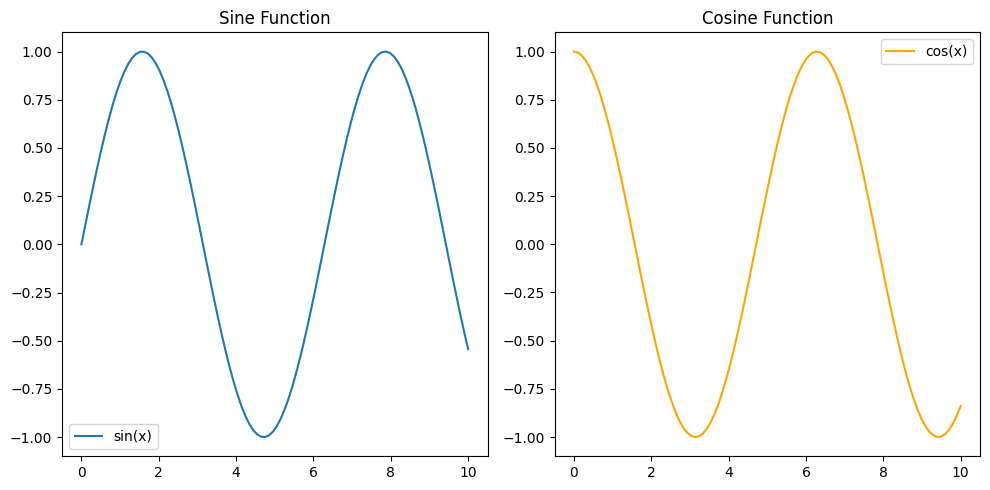

In [6]:
import matplotlib.pyplot as plt
import numpy as np
# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
# Create figure and subplots
plt.figure(figsize=(10, 5))
# Subplot 1 (1 row, 2 columns, 1st plot)
plt.subplot(1, 2, 1)
plt.plot(x, y1, label='sin(x)')
plt.title('Sine Function')
plt.legend()

# Subplot 2 (1 row, 2 columns, 2nd plot)
plt.subplot(1, 2, 2)
plt.plot(x, y2, label='cos(x)', color='orange')
plt.title('Cosine Function')
plt.legend()
plt.savefig(fr'C:\Users\yhuang73\Desktop\1.png', format='png')
# Show the plot
plt.tight_layout()
plt.show()